# **Group 8 Project Proposal - User Knowledge Modeling Data Set**
Authors: Minting Fu, Zeti Batrisha Jamiluddin Amini, Liz Ji, Caroline Zhang

## INTRODUCTION

In this project, we will study a data set of the knowledge status of 403 students on the topic of Electrical DC Machines.

We would like to investigate this question through our project:

* Is there a relationship between STG, SCG, STR, LPR, PEG and UNS? (ie. which of STG, SCG, STR, LPR, PEG are contributing factors to UNS?)


The user modeling system classifies UNS (the knowledge level of users) depending on the values of 5 attributes. They are:

* STG : the degree of study time for goal object materails.
* SCG : the degree of repetition number of user for goal object materails.
* STR : the degree of study time of user for related objects with goal object.
* LPR : the exam performance of user for related objects with goal object.
* PEG : the exam performance of user for goal objects.

## Citation
Dua, D. and Graff, C. (2019). <a href="http://archive.ics.uci.edu/ml" target="_blank">UCI Machine Learning Repository</a>. Irvine, CA: University of California, School of Information and Computer Science.

H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.

## Data Analysis

In [26]:
#Import the pacakge we need to analyze the data
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)

In [27]:
#Using the set.seed function to make sure our code is reproducible
set.seed(7)

In [28]:
# download the file from the website
url <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls'
download.file(url, destfile='data/user_knowledge_data.xls')

# read and clean the training data, and making sure that the target variable, UNS, is a factor type
training_data <- read_excel('data/user_knowledge_data.xls', sheet=2, range='A1:F259') %>% 
                mutate(UNS = as_factor(UNS)) 
print("Training Data")
training_data


# read and clean the testing data, and making sure that the target variable, UNS, is a factor type
test_data <- read_excel('data/user_knowledge_data.xls', sheet=3, range='A1:F146') %>% 
                mutate(UNS = as_factor(UNS))

print("Test Data")
test_data

[1] "Training Data"


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


[1] "Test Data"


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


**We can see from each table above:**

    1. each row is a single observation
    2. each column is a single variable 
    3. each value is a single cell.
**Therefore, the training set and testing set are clean and tidy now.**

**We also notice that `the proportion of the training_data is around 64%`, and `the proportion of the test data is around 36%`.**

In [29]:
# summarise the maximum value of each predictors
training_data_max <- training_data %>%
                     select(-UNS) %>%
                     map_df(max, na.rm = TRUE)
print("The maximum value of each predictors")
training_data_max

# summarise the minimum value of each predictors
training_data_min <- training_data %>%
                     select(-UNS) %>%
                     map_df(min, na.rm = TRUE)
print("The minimum value of each predictors")
training_data_min

# summarise the average value of each predictors
training_data_avg <- training_data %>%
                     select(-UNS) %>%
                     map_df(mean, na.rm = TRUE)
print("The average value of each predictors")
training_data_avg

[1] "The maximum value of each predictors"


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.99,0.9,0.95,0.99,0.93


[1] "The minimum value of each predictors"


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0


[1] "The average value of each predictors"


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


**According to the tables above, we can see the range of each variable is :**
* The range of STG, the degree of study time for goal object materails, is [0, 0.99].
* The range of SCG, the degree of repetition number of user for goal object materails, is [0, 0.9].
* The range of STR, the degree of study time of user for related objects with goal object, is [0, 0.95].
* The range of LPR, the exam performance of user for related objects with goal object, is [0, 0.99].
* The range of PEG, the exam performance of user for goal objects, is [0, 0.93].

In [30]:
# Determine how many rows have missing data for each variable
stg_miss <- sum(is.na(training_data$STG))
sprintf("The number of missing data in STG: %s", stg_miss)

scg_miss <- sum(is.na(training_data$SCG))
sprintf("The number of missing data in STG: %s", scg_miss)

str_miss <- sum(is.na(training_data$STR))
sprintf("The number of missing data in STG: %s", str_miss)

lpr_miss <- sum(is.na(training_data$LPR))
sprintf("The number of missing data in STG: %s", lpr_miss)

peg_miss <- sum(is.na(training_data$PEG))
sprintf("The number of missing data in STG: %s", peg_miss)

[1] "The number of missing data in STG: 0"

[1] "The number of missing data in STG: 0"

[1] "The number of missing data in STG: 0"

[1] "The number of missing data in STG: 0"

[1] "The number of missing data in STG: 0"

**Now, we have some basic idea about our dataset. In the next step, We want to know which factor(s) is related to our target variable (UNS), in other words, which factor is our explanatory variable. To do this, we need to visualize our data to find out if there is a relationship between STG, SCG, STR, LPR, PEG and UNS.**

## Data Visualization
To visualize the data, we will use the `ggpairs` function, which returns a matrix of plots for a given dataset. Since we have 4 potential explanatory variables, it is better to compare the distibution and evaluate the association of each of them in a whole. The `ggpairs` function provides an efficient way to exploring the distribution and correlation between different variables.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



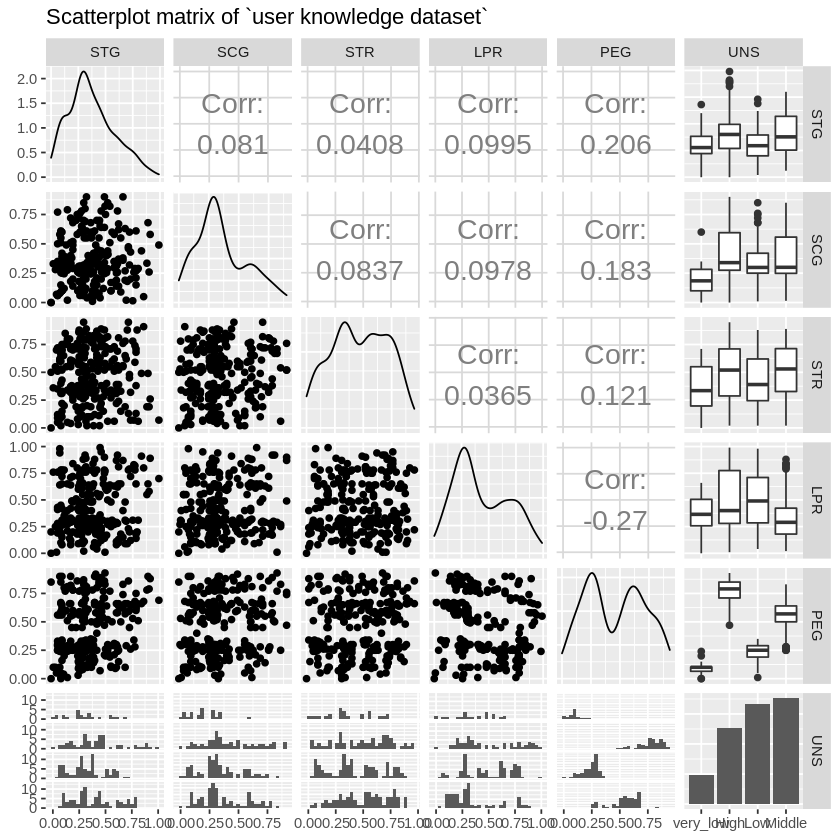

In [54]:
relationship_plot <- ggpairs(training_data[, c(1,2:6)], upper = list(continuous = wrap('cor', size = 6)), title = "Scatterplot matrix of `user knowledge dataset`")
relationship_plot